In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
import keras
from keras.models import * 
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [3]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [4]:
from sklearn.datasets import load_files
import numpy as np

train_dir = 'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train'
test_dir = 'C:\\Users\\Admin\\Downloads\\int_image_test\\seg_test'



In [5]:
def load_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
X_train, Y_train,target_labels = load_data(train_dir)
X_test, Y_test,_ = load_data(test_dir)
print('Length of X_train :',len(X_train), "Length of Y_train: ",len(Y_train))
print('Length of X_test :',len(X_test), "Length of Y_test: ",len(Y_test))

Length of X_train : 14034 Length of Y_train:  14034
Length of X_test : 3000 Length of Y_test:  3000


In [6]:
classes = len(np.unique((Y_train)))
classes

6

In [7]:
print(Y_train[0:10])

#Target nos are in nos, we need to convert them to vectors

[2 0 5 5 3 4 2 1 2 3]


In [8]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train,classes)
Y_test = np_utils.to_categorical(Y_test,classes)
Y_train[0]
# only third element has value 1(corresponding to its label) and others are 0.

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
X_train 
#We only have file names in the x set so, we need to load the images and convert back to array

array(['C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\glacier\\6416.jpg',
       'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\buildings\\5658.jpg',
       'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\street\\7656.jpg',
       ...,
       'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\sea\\13907.jpg',
       'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\sea\\3467.jpg',
       'C:\\Users\\Admin\\Downloads\\int_image_train\\seg_train\\forest\\14133.jpg'],
      dtype='<U70')

In [10]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def revert_image_to_array(files):
    images_array=[]
    for file in files:
        images_array.append(img_to_array(load_img(file,target_size=(150,150),color_mode="rgb") ))
    return images_array

X_train = np.array(revert_image_to_array(X_train))
print('X train shape : ',X_train.shape)

X_test = np.array(revert_image_to_array(X_test))
print('X test shape : ',X_test.shape)


X train shape :  (14034, 150, 150, 3)
X test shape :  (3000, 150, 150, 3)


In [11]:
print('X train first image shape ',X_train[0].shape)

print('X train first image as array',X_train[0])


#We need to rescale these values given in the array

X train first image shape  (150, 150, 3)
X train first image as array [[[124. 155. 202.]
  [126. 157. 203.]
  [130. 158. 205.]
  ...
  [ 89. 119. 171.]
  [ 90. 120. 172.]
  [ 93. 123. 175.]]

 [[119. 150. 197.]
  [122. 153. 200.]
  [125. 156. 202.]
  ...
  [ 86. 121. 175.]
  [ 88. 123. 177.]
  [ 88. 123. 177.]]

 [[116. 148. 195.]
  [119. 151. 198.]
  [123. 155. 202.]
  ...
  [ 92. 127. 181.]
  [ 90. 125. 179.]
  [ 85. 120. 174.]]

 ...

 [[ 43.  28.  21.]
  [ 29.  15.   6.]
  [ 39.  25.  16.]
  ...
  [ 36.  20.  23.]
  [ 35.  19.  20.]
  [ 69.  50.  52.]]

 [[ 33.  16.   9.]
  [ 31.  14.   7.]
  [ 53.  36.  28.]
  ...
  [ 34.  15.  19.]
  [ 15.   0.   0.]
  [ 56.  37.  41.]]

 [[ 45.  26.  22.]
  [ 37.  18.  12.]
  [ 38.  19.  13.]
  ...
  [ 84.  65.  69.]
  [ 78.  59.  63.]
  [ 29.  10.  14.]]]


In [12]:
# time to re-scale so that all the pixel values lie within 0 to 1
X_train = np.true_divide(X_train, 255)
X_test = np.true_divide(X_test, 255)
X_train[0]

array([[[0.4862745 , 0.60784316, 0.7921569 ],
        [0.49411765, 0.6156863 , 0.79607844],
        [0.50980395, 0.61960787, 0.8039216 ],
        ...,
        [0.34901962, 0.46666667, 0.67058825],
        [0.3529412 , 0.47058824, 0.6745098 ],
        [0.3647059 , 0.48235294, 0.6862745 ]],

       [[0.46666667, 0.5882353 , 0.77254903],
        [0.47843137, 0.6       , 0.78431374],
        [0.49019608, 0.6117647 , 0.7921569 ],
        ...,
        [0.3372549 , 0.4745098 , 0.6862745 ],
        [0.34509805, 0.48235294, 0.69411767],
        [0.34509805, 0.48235294, 0.69411767]],

       [[0.45490196, 0.5803922 , 0.7647059 ],
        [0.46666667, 0.5921569 , 0.7764706 ],
        [0.48235294, 0.60784316, 0.7921569 ],
        ...,
        [0.36078432, 0.49803922, 0.70980394],
        [0.3529412 , 0.49019608, 0.7019608 ],
        [0.33333334, 0.47058824, 0.68235296]],

       ...,

       [[0.16862746, 0.10980392, 0.08235294],
        [0.11372549, 0.05882353, 0.02352941],
        [0.15294118, 0

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint



model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = 2,activation= 'relu', input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))


model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32,kernel_initializer='glorot_uniform',activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(6,activation = 'softmax'))


model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 128)     1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


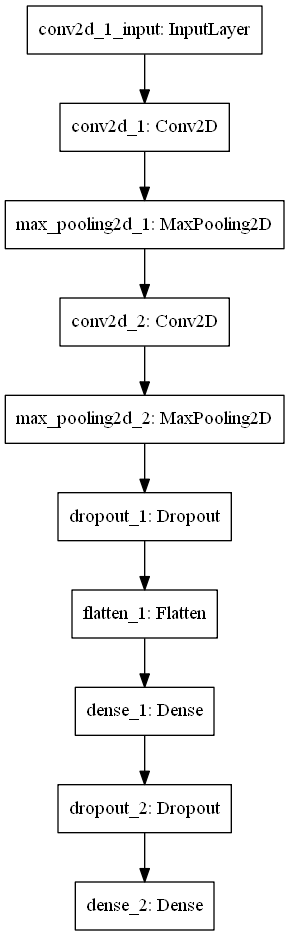

In [15]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png')

In [17]:
from keras.callbacks import *
history1 = History()

In [16]:
lrr = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.1, patience = 2, verbose = 0,mode = 'auto', min_delta = 0.0001,cooldown = 0,min_lr = 0)
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0,patience = 2,verbose = 0, mode = 'auto',baseline = None,restore_best_weights = True)
#checkpointer = ModelCheckpoint(filepath = 'cnn_from_intel_class.hdf5', verbose = 1, save_best_only = True)

history= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=25,callbacks=[lrr,earlystop])

Train on 14034 samples, validate on 3000 samples
Epoch 1/25
14034/14034 [==============================] - 999s 71ms/step - loss: 1.4567 - accuracy: 0.4321 - val_loss: 1.1918 - val_accuracy: 0.6327
Epoch 2/25
14034/14034 [==============================] - 963s 69ms/step - loss: 1.2145 - accuracy: 0.5334 - val_loss: 1.0421 - val_accuracy: 0.6710
Epoch 3/25
14034/14034 [==============================] - 735s 52ms/step - loss: 1.0264 - accuracy: 0.5878 - val_loss: 0.8725 - val_accuracy: 0.7217
Epoch 4/25
14034/14034 [==============================] - 718s 51ms/step - loss: 0.9241 - accuracy: 0.6323 - val_loss: 0.8156 - val_accuracy: 0.7217
Epoch 5/25
14034/14034 [==============================] - 719s 51ms/step - loss: 0.8483 - accuracy: 0.6667 - val_loss: 0.7186 - val_accuracy: 0.7597
Epoch 6/25
14034/14034 [==============================] - 715s 51ms/step - loss: 0.8059 - accuracy: 0.6734 - val_loss: 0.7976 - val_accuracy: 0.7160
Epoch 7/25
14034/14034 [==============================] -

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [23]:
import warnings
warnings.filterwarnings('ignore')

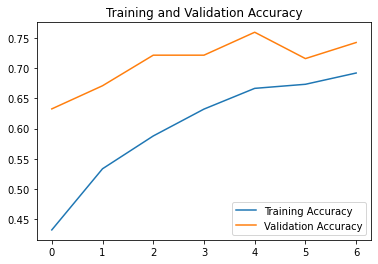

<Figure size 432x288 with 0 Axes>

In [24]:
epochs = range(len(acc))
sns.lineplot(epochs,acc,label = 'Training Accuracy')
sns.lineplot(epochs,val_acc,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure();

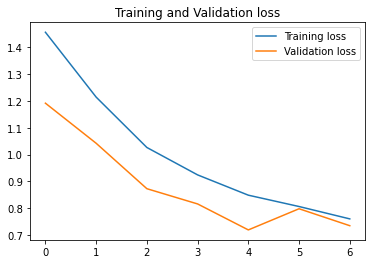

<Figure size 432x288 with 0 Axes>

In [25]:
epochs = range(len(acc))
sns.lineplot(epochs,loss,label = 'Training loss')
sns.lineplot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure();

In [27]:
# evaluate and print test accuracy
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])


3000/3000 [==============================] - 35s 12ms/step

 Test accuracy: 0.7596666812896729


In [29]:
# load the weights that yielded the best validation accuracy
#model.load_weights('cnn_from_intel_class_.hdf5')
# saving the model with 76.60% accuracy
model.save('cnn_intel_img_clf_.model')

In [ ]:
# loading the saved model
#from keras.models import load_model
#model1 = load_model('Perfect.model')

In [30]:
# Let's visualize test prediction.

y_pred = model.predict_classes(X_test)
y_pred

array([0, 5, 3, ..., 3, 5, 5], dtype=int64)

In [34]:
Y_test

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
X_test, Y_test,_ = load_data(test_dir)
print('Length of X_test :',len(X_test), "Length of Y_test: ",len(Y_test))

Length of X_test : 3000 Length of Y_test:  3000


In [36]:
Y_test

array([0, 2, 3, ..., 3, 5, 5])

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('Accuracy score fore testing : ',accuracy_score(y_pred,Y_test))

Accuracy score fore testing :  0.7596666666666667
